https://www.kaggle.com/datasets/themrityunjaypathak/covid-cases-and-deaths-worldwide

**Note: dataset link on kaggle**

In [1]:
!pip install country_converter

  Using cached country_converter-1.0.0-py3-none-any.whl (44 kB)


DEPRECATION: Loading egg at c:\users\fptshop\appdata\local\programs\python\python311\lib\site-packages\torchlight-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [ ]:
import numpy as np
import pandas as ps
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import country_converter as coco
from google.colab import files
import warnings

warnings.filterwarnings('ignore')

# **Viewing Data**

**Tú**

In [ ]:
df = ps.read_csv('covid_worldwide.csv')
df.replace(',','', regex=True, inplace=True)

In [ ]:
df

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,104196861,1132935,101322779,1741147,1159832679,334805269
1,2,India,44682784,530740,44150289,1755,915265788,1406631776
2,3,France,39524311,164233,39264546,95532,271490188,65584518
3,4,Germany,37779833,165711,37398100,216022,122332384,83883596
4,5,Brazil,36824580,697074,35919372,208134,63776166,215353593
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,626161
229,230,MS Zaandam,9,2,7,0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


In [ ]:
df['Total Cases']=df['Total Cases'].str.replace(',', '', regex=True).astype("float")
df['Total Deaths']=df['Total Deaths'].str.replace(',', '', regex=True).astype("float")
df['Total Recovered']=df['Total Recovered'].str.replace(',', '', regex=True).astype("float")
df['Active Cases']=df['Active Cases'].str.replace(',', '', regex=True).astype("float")
df['Total Test']=df['Total Test'].str.replace(',', '', regex=True).astype("float")
df['Population']=df['Population'].str.replace(',', '', regex=True).astype("float")

In [ ]:
df = df.drop('Serial Number', axis=1)
df.index = np.arange(1, len(df)+1)
df

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
1,USA,104196861.0,1132935.0,101322779.0,1741147.0,1.159833e+09,3.348053e+08
2,India,44682784.0,530740.0,44150289.0,1755.0,9.152658e+08,1.406632e+09
3,France,39524311.0,164233.0,39264546.0,95532.0,2.714902e+08,6.558452e+07
4,Germany,37779833.0,165711.0,37398100.0,216022.0,1.223324e+08,8.388360e+07
5,Brazil,36824580.0,697074.0,35919372.0,208134.0,6.377617e+07,2.153536e+08
...,...,...,...,...,...,...,...
227,Diamond Princess,712.0,13.0,699.0,0.0,NaN,NaN
228,Vatican City,29.0,NaN,29.0,0.0,NaN,7.990000e+02
229,Western Sahara,10.0,1.0,9.0,0.0,NaN,6.261610e+05
230,MS Zaandam,9.0,2.0,7.0,0.0,NaN,NaN


Ở bước này, vì Dataframe của Pandas vốn đã có sẵn index để đánh số thứ tự cho các hàng nên nhóm em đã bỏ đi một column thừa 'Serial Number' và nhóm em cũng set lại index tự động bắt đầu từ 1.


# **Cleaning Data**
**Tú**

In [ ]:
df.isna().sum()

Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64

In [ ]:
df[df['Total Deaths'].isna()]


,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
222,Tuvalu,2805.0,NaN,NaN,2805.0,NaN,12066.0
223,Saint Helena,2166.0,NaN,2.0,2164.0,NaN,6115.0
224,Falkland Islands,1930.0,NaN,1930.0,0.0,8632.0,3539.0
226,Niue,747.0,NaN,746.0,1.0,NaN,1622.0
228,Vatican City,29.0,NaN,29.0,0.0,NaN,799.0
231,Tokelau,5.0,NaN,NaN,5.0,NaN,1378.0


Trong dataset, như chúng ta có thể thấy một cách trực quan, các giá trị NaN của cột 'Total Deaths' có nghĩa là 0. Vì chúng ta cũng có thể thấy rằng Total Cases = Total Recoverd + Active Cases, vì vậy Total Deaths là 0.

In [ ]:
df['Total Deaths'].fillna(0, inplace=True)

**Tiếp tục xử lí với cột Population**

In [ ]:
df[df['Population'].isna()]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
91,China,503302.0,5272.0,379053.0,118977.0,160000000.0,NaN
227,Diamond Princess,712.0,13.0,699.0,0.0,NaN,NaN
230,MS Zaandam,9.0,2.0,7.0,0.0,NaN,NaN


**Để có một con số chính xác, nhóm em đã lấy nguồn từ internet về thông tin dân số của Trung Quốc, hai cái tên còn lại là Diamond Princess và MS Zaandam không phải đất nước mà là tên của hai phi thuyền nên sẽ bị loại khỏi dataset**

In [ ]:
df.loc[91,'Population']=1454204753
df = df.drop(labels=[227,230], axis=0, inplace = False)


**Kiểm tra các giá trị sau khi chỉnh sửa**

In [ ]:
df.loc[91]

Country                   China
Total Cases            503302.0
Total Deaths             5272.0
Total Recovered        379053.0
Active Cases           118977.0
Total Test          160000000.0
Population         1454204753.0
Name: 91, dtype: object

In [ ]:
df.index = np.arange(1, len(df)+1)
df

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
1,USA,104196861.0,1132935.0,101322779.0,1741147.0,1.159833e+09,3.348053e+08
2,India,44682784.0,530740.0,44150289.0,1755.0,9.152658e+08,1.406632e+09
3,France,39524311.0,164233.0,39264546.0,95532.0,2.714902e+08,6.558452e+07
4,Germany,37779833.0,165711.0,37398100.0,216022.0,1.223324e+08,8.388360e+07
5,Brazil,36824580.0,697074.0,35919372.0,208134.0,6.377617e+07,2.153536e+08
...,...,...,...,...,...,...,...
225,Montserrat,1403.0,8.0,1376.0,19.0,1.776200e+04,4.965000e+03
226,Niue,747.0,0.0,746.0,1.0,NaN,1.622000e+03
227,Vatican City,29.0,0.0,29.0,0.0,NaN,7.990000e+02
228,Western Sahara,10.0,1.0,9.0,0.0,NaN,6.261610e+05


**Tiếp theo là cột Total Recovered và Active Cases**

In [ ]:
df[df['Active Cases'].isnull()]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
11,Turkey,17042722.0,101492.0,NaN,NaN,162743369.0,85561976.0
66,Tunisia,1150356.0,29308.0,NaN,NaN,4997373.0,12046656.0
78,Paraguay,806256.0,19820.0,NaN,NaN,2657506.0,7305843.0
95,Honduras,470757.0,11104.0,NaN,NaN,1619676.0,10221247.0
112,Martinique,229687.0,1097.0,NaN,NaN,828928.0,374087.0
113,Laos,217973.0,758.0,NaN,NaN,1233207.0,7481023.0
114,Iceland,208688.0,229.0,NaN,NaN,1996384.0,345393.0
118,Guadeloupe,201394.0,1007.0,NaN,NaN,938039.0,399794.0
137,Suriname,82020.0,1398.0,NaN,NaN,239603.0,596831.0
139,French Polynesia,77957.0,649.0,NaN,NaN,NaN,284164.0


In [ ]:
df[df['Total Recovered'].isnull()]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
11,Turkey,17042722.0,101492.0,NaN,NaN,162743369.0,85561976.0
66,Tunisia,1150356.0,29308.0,NaN,NaN,4997373.0,12046656.0
78,Paraguay,806256.0,19820.0,NaN,NaN,2657506.0,7305843.0
95,Honduras,470757.0,11104.0,NaN,NaN,1619676.0,10221247.0
112,Martinique,229687.0,1097.0,NaN,NaN,828928.0,374087.0
113,Laos,217973.0,758.0,NaN,NaN,1233207.0,7481023.0
114,Iceland,208688.0,229.0,NaN,NaN,1996384.0,345393.0
118,Guadeloupe,201394.0,1007.0,NaN,NaN,938039.0,399794.0
137,Suriname,82020.0,1398.0,NaN,NaN,239603.0,596831.0
139,French Polynesia,77957.0,649.0,NaN,NaN,NaN,284164.0


Vì không có thông tin ở các Quốc gia này có thể giúp để điền vào giá trị còn thiếu nên không có lựa chọn nào khác ngoài việc loại bỏ chúng khỏi dataset.

In [ ]:
df.dropna(inplace=True)
df.index = np.arange(1, len(df)+1)
df.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
1,USA,104196861.0,1132935.0,101322779.0,1741147.0,1.159833e+09,3.348053e+08
2,India,44682784.0,530740.0,44150289.0,1755.0,9.152658e+08,1.406632e+09
3,France,39524311.0,164233.0,39264546.0,95532.0,2.714902e+08,6.558452e+07
4,Germany,37779833.0,165711.0,37398100.0,216022.0,1.223324e+08,8.388360e+07
5,Brazil,36824580.0,697074.0,35919372.0,208134.0,6.377617e+07,2.153536e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 1 to 197
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          197 non-null    object 
 1   Total Cases      197 non-null    float64
 2   Total Deaths     197 non-null    float64
 3   Total Recovered  197 non-null    float64
 4   Active Cases     197 non-null    float64
 5   Total Test       197 non-null    float64
 6   Population       197 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.3+ KB


**Dataset đã được clean và không còn giá trị thiếu**

In [ ]:
display(df.Country.values)

array(['USA', 'India', 'France', 'Germany', 'Brazil', 'Japan', 'S. Korea',
       'Italy', 'UK', 'Russia', 'Spain', 'Vietnam', 'Australia',
       'Argentina', 'Taiwan', 'Netherlands', 'Iran', 'Mexico',
       'Indonesia', 'Poland', 'Colombia', 'Austria', 'Greece', 'Portugal',
       'Ukraine', 'Chile', 'Malaysia', 'Israel', 'Thailand', 'Belgium',
       'Czechia', 'Canada', 'Peru', 'Switzerland', 'Philippines',
       'South Africa', 'Romania', 'Denmark', 'Hong Kong', 'Sweden',
       'Serbia', 'Iraq', 'Singapore', 'Hungary', 'New Zealand',
       'Bangladesh', 'Slovakia', 'Georgia', 'Jordan', 'Ireland',
       'Pakistan', 'Norway', 'Finland', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Bulgaria', 'Morocco', 'Croatia', 'Lebanon',
       'Guatemala', 'Bolivia', 'Costa Rica', 'Cuba', 'Ecuador', 'UAE',
       'Uruguay', 'Panama', 'Mongolia', 'Nepal', 'Belarus', 'Latvia',
       'Saudi Arabia', 'Azerbaijan', 'Bahrain', 'Sri Lanka', 'Kuwait',
       'Dominican Republic', 'Cyprus', 'Myan

# **EDA**

**Lê Anh Tú - Total case in globe by world map**




In [ ]:
fig = px.scatter_geo(df, locations='Country',locationmode="country names",scope="world",color="Total Cases",size="Total Cases",size_max=50,title="Covid-19 Total Cases Around the Globe",color_continuous_scale="viridis")
fig.show()

***Biểu đồ thế giới để có cái nhìn trực quan về độ phân tán và tập trung của dịch bệnh ở các vùng trên thế giới.***
1. Ở Châu Mỹ có hai vùng dịch lớn là Bắc Mĩ và Nam Mỹ.
2. Các ca mắc bệnh Covid-19 phân bố tập trung nhất ở Châu Âu. Đặc biệt ở các nước như Anh, Ý, Đức, Tây Ban Nha...
3. Sau đó là khu vực Châu Á với số ca bệnh tập trung nhiều ở Ấn Độ, Nhật Bản và Hàn Quốc.
4. Những nơi còn lại phân tán khá đồng đều.

**Lê Anh Tú - Total Death by World Map**

In [ ]:
fig = px.scatter_geo(df, locations='Country',locationmode="country names",scope="world",color="Total Deaths",size="Total Deaths",size_max=30,title="Covid-19 Total Deaths Around the Globe",template='plotly_dark',color_continuous_scale="Viridis_r")
fig.show()

So sánh với biểu đồ trước về các ca bệnh, ta có thể dễ dàng thấy những vùng có dịch bệnh lan rộng đều có số ca tử vong tương đối cao. Điển hình là Mỹ với hơn 1 triệu ca tử vong. Vậy tỉ lệ của chúng là như thế nào?

**Nguyệt**

**Đánh giá tổng quan về tỉ lệ ca bệnh - tử vong**

Text(0.5, 1.0, "Countries' ratio of death")

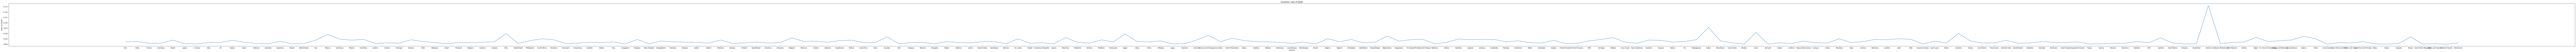

In [ ]:
# Line diagram about countries and their ratio of death because of Covid and evalute it


fig = plt.figure(figsize=(300, 5))
ax = fig.add_subplot(111)
ax.plot(df["Country"], df[ "Total Deaths"]/df["Total Cases"])
plt.xlabel('Country')
plt.ylabel('Ratio of Death')
plt.title("Countries' ratio of death")

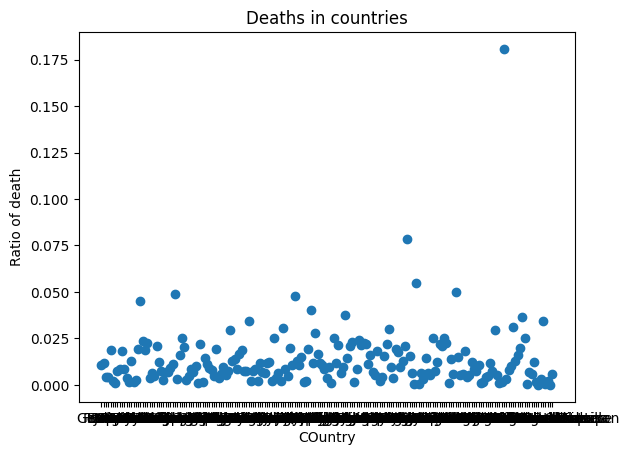

In [ ]:
x_axis = df["Country"]
y_axis = df[ "Total Deaths"]/df["Total Cases"]

plt.scatter(x_axis, y_axis)
plt.title('Deaths in countries')
plt.xlabel('COuntry')
plt.ylabel('Ratio of death')
plt.show()

(Ấn vào bảng để xem)

Tỷ lệ tử vong do Covid 19 hầu hết ở các nước không cao, trung bình từ mức 2.5% đến 5%. Tuy nhiên có một vài nước có tỷ lệ cao hơn cả, ví dụ SUdan, Syria,... cao nhất là Yemen. Nguyên nhân được cho là tùy thuộc sự phát triển về trình độ y khoa tại mỗi nước. Ví dụ ở những nước có nền văn minh phát triển hơn như USA, Thái Lan... thì có tỉ lệ tử vong thấp dưới 1%.

**Nguyệt**

**Đánh giá tổng quan về tỉ lệ ca bệnh - phục hồi**

Text(0.5, 1.0, "Countries' ratio of recovery")

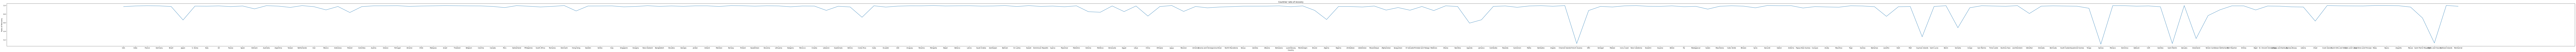

In [ ]:
# Phạm Ánh Nguyệt
# Line diagram about countries and their ratio of recovered cases and evalute it

fig = plt.figure(figsize=(300, 5))
ax = fig.add_subplot(111)
ax.plot(df["Country"], df[ "Total Recovered"]/df["Total Cases"])
plt.xlabel('Country')
plt.ylabel('Ratio of Recovery')
plt.title("Countries' ratio of recovery")

Tỷ lệ hồi phục ở các nước nhìn chung cao, trung bình nằm từ 80% - 100%, như nước ta là 90%. Tuy nhiên có một vài nước có tỷ lệ khá thấp, ví dụ Japan với 65%, có thể dự đoán nguyên nhân của kết quả này là vì dân số Nhật Bản thuộc dạng dân số già - nhóm đối tượng có khả năng hồi phục khá kém. Một số nước khác có tỷ lệ hồi phục rất thấp, như Samoa, Saint Martin với chỉ khoảng 10%. Nguyên nhân hầu như được cho là tùy thuộc sự phát triển về trình độ y khoa tại mỗi nước. Ví dụ ở những nước có nền văn minh phát triển hơn như USA, Thái Lan... thì có tỉ lệ tử vong thấp dưới 1%.

```
# This is formatted as code
```



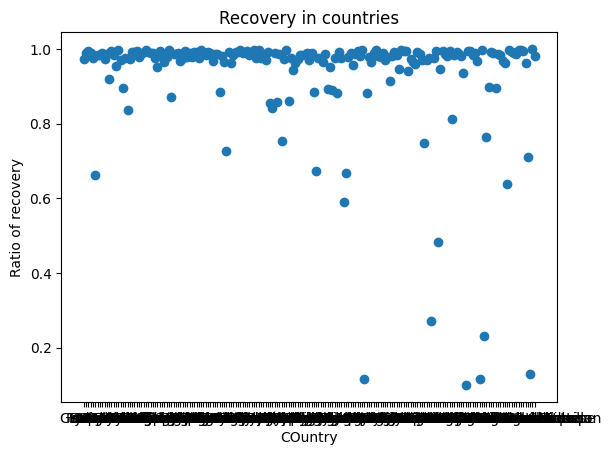

In [ ]:
x_axis = df["Country"]
y_axis = df[ "Total Recovered"]/df["Total Cases"]

plt.scatter(x_axis, y_axis)
plt.title('Recovery in countries')
plt.xlabel('COuntry')
plt.ylabel('Ratio of recovery')
plt.show()


#**Further Evaluate**

**Trịnh**

Vấn đề: Vẽ biểu đồ cột về tỉ lệ tử vong highest và lowest rồi đánh giá xem các ca tử vong có tỉ lệ cao rơi vào nhóm nước nào (pt or đang phát triển hay châu nào). Rút ra nhận xét về sự tương quan cặp features tử vong - ca bệnh bằng biểu đồ scatter or correlation or heatmap.

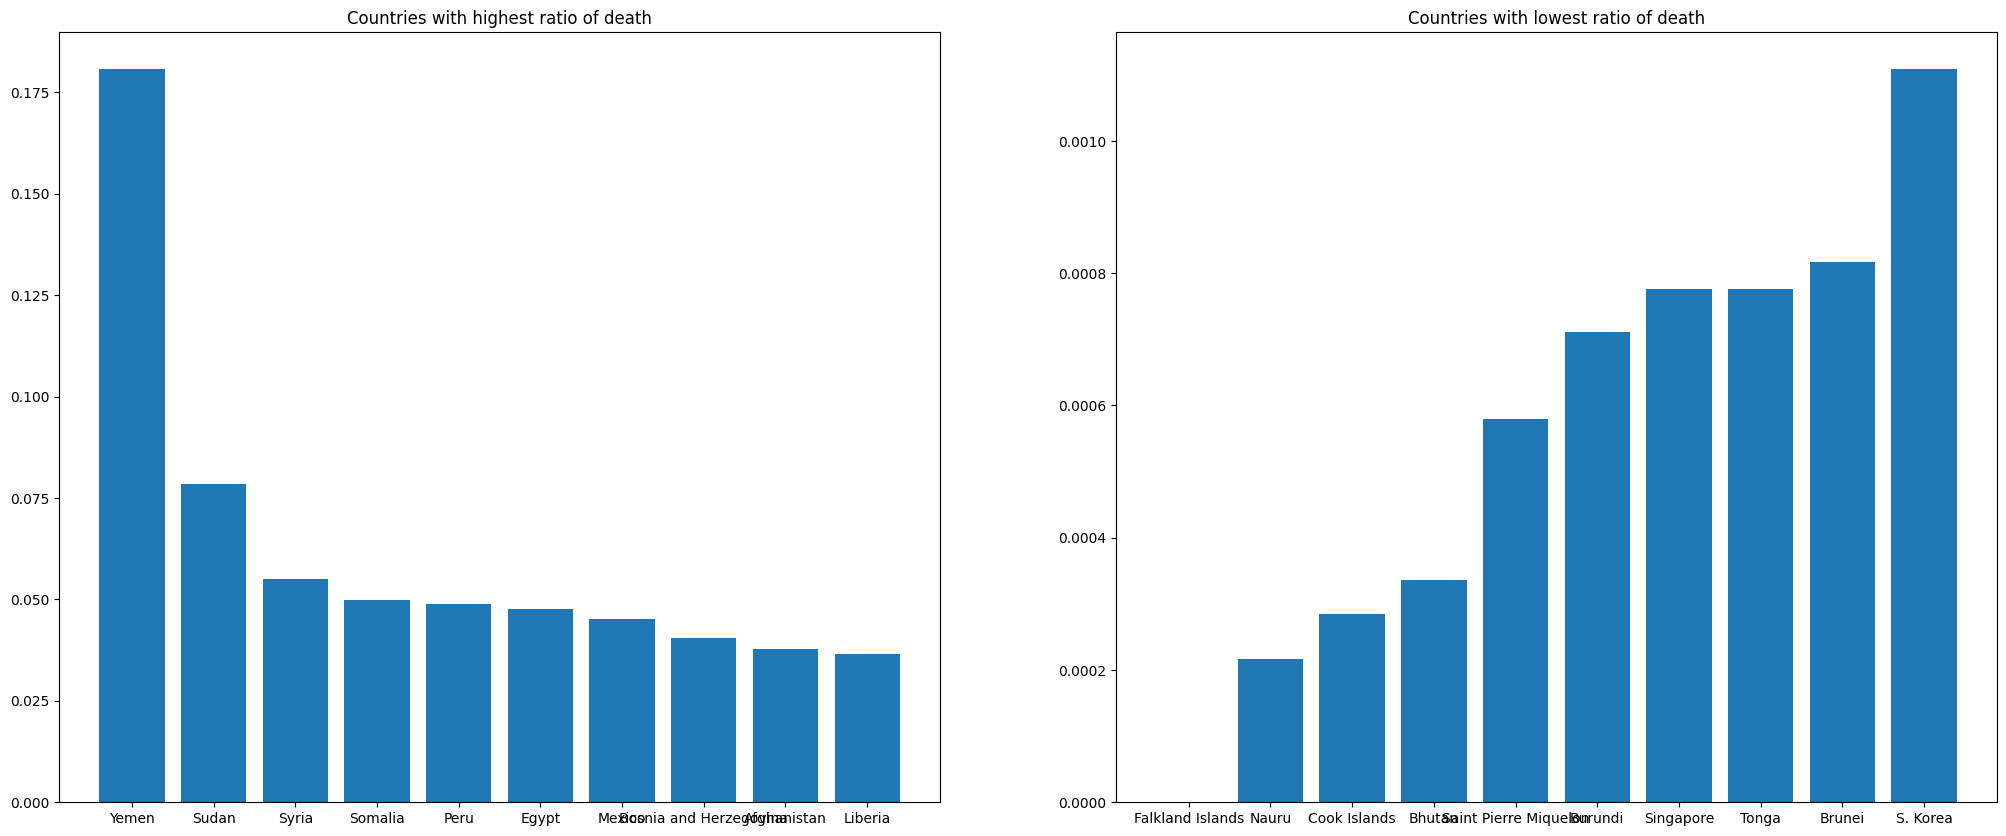

In [ ]:
# Calculate ratio of death and ratio of recovery
df['Ratio of Death'] = df['Total Deaths'] / df['Total Cases']
df['Ratio of Recovery'] = df['Total Recovered'] / df['Total Cases']

# Get the 10 countries with the highest ratio of death
highest_ratio_of_death = df.nlargest(10, 'Ratio of Death')

# Get the 10 countries with the lowest ratio of death
lowest_ratio_of_death = df.nsmallest(10, 'Ratio of Death')

# Create a bar chart of the 10 countries with the highest and lowest ratio of death
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].bar(highest_ratio_of_death['Country'], highest_ratio_of_death['Ratio of Death'])
ax[0].set_title('Countries with highest ratio of death')

ax[1].bar(lowest_ratio_of_death['Country'], lowest_ratio_of_death['Ratio of Death'])
ax[1].set_title('Countries with lowest ratio of death')

plt.show()


tỉ lệ tử vong cao chủ yếu rơi vào các nước: yemen, sudan, syria, somalia, peru, egypt,... các nước này chủ yếu nằm trên một khu vực trung đông và bắc phi có cơ sở vật tư y tế còn chưa phát triển mạnh hoặc trong nước có sự chênh lệch veefcow sở vật tư y tế từng vùng như syria, egypt.
-- đối với các nước có tỉ lệ tử vong thấp: triều tiên, bruney, tonga, singapore,... đặc điển chung các nước này có diện tích khá nhỏ và ít người sinh sống chủ yếu rơi vào các nước đang phát triển duy chỉ có sinhgapore và triều tiên là 2 trường hợp đặc biệt. một đất nước có hệ thống y tế hoàn hảo còn một đất nước quá ít thông tin để thống kê chính xác.


**Thái**

Vấn đề: vẽ biểu đồ highest and lowest rồi đánh giá xem các ca phục hồi có tỉ lệ cao rơi vào nhóm nước nào (pt or đang phát triển hay châu nào), Rút ra nhận xét về sự tương quan cặp features ca bệnh - phục hồi

Text(0.5, 1.0, 'Top 5 Lowest Total Recovered')

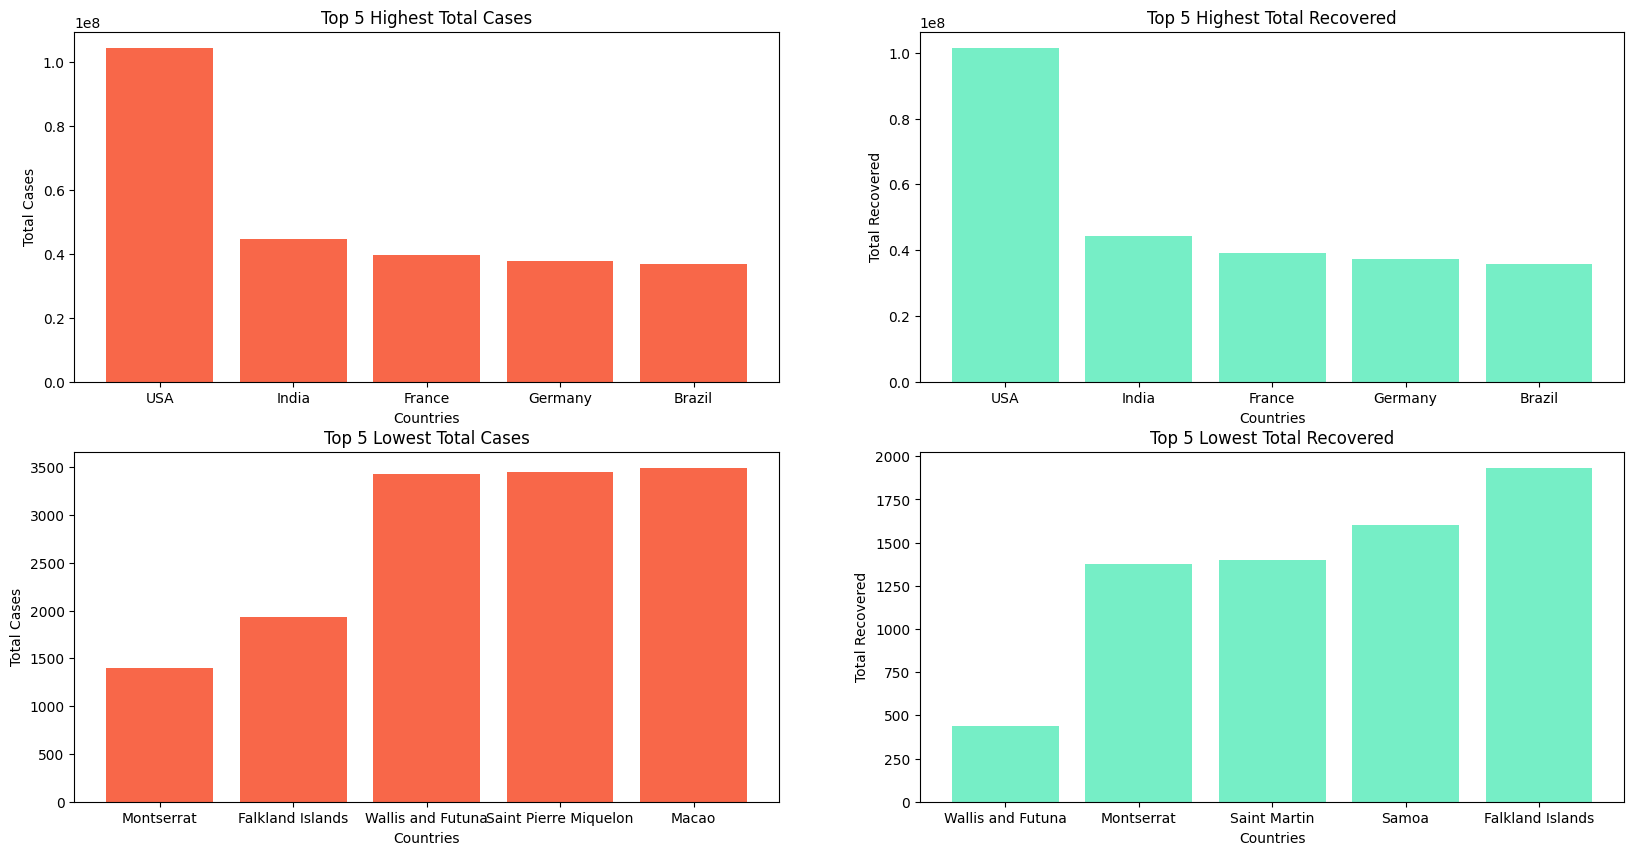

In [ ]:
fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))
# Lấy ra 5 giá trị lớn nhất
sort_df1 = df.sort_values('Total Cases', ascending=False)
top_5_total1 = sort_df1['Total Cases'].head()
top_5_country1 = sort_df1['Country'].head()

sort_df2 = df.sort_values('Total Recovered', ascending=False)
top_5_total2 = sort_df2['Total Recovered'].head()
top_5_country2 = sort_df2['Country'].head()

sort_df3 = df.sort_values('Total Cases', ascending=True)
top_5_total3 = sort_df3['Total Cases'].head()
top_5_country3 = sort_df3['Country'].head()

sort_df4 = df.sort_values('Total Recovered', ascending=True)
top_5_total4 = sort_df4['Total Recovered'].head()
top_5_country4 = sort_df4['Country'].head()

# Vẽ biểu đồ
ax1.bar(top_5_country1,top_5_total1, color = '#F86749')
ax2.bar(top_5_country2,top_5_total2, color = '#76EEC6')
ax3.bar(top_5_country3,top_5_total3, color = '#F86749')
ax4.bar(top_5_country4,top_5_total4, color = '#76EEC6')

# Đặt tên cho trục x, trục y, title
ax1.set_xlabel('Countries')
ax1.set_ylabel('Total Cases')

ax2.set_xlabel('Countries')
ax2.set_ylabel('Total Recovered')

ax3.set_xlabel('Countries')
ax3.set_ylabel('Total Cases')

ax4.set_xlabel('Countries')
ax4.set_ylabel('Total Recovered')

#set title
ax1.set_title('Top 5 Highest Total Cases')
ax2.set_title('Top 5 Highest Total Recovered')
ax3.set_title('Top 5 Lowest Total Cases')
ax4.set_title('Top 5 Lowest Total Recovered')


5 nước có ca mắc covid-19 lớn nhất gồm có: Mỹ, Ấn Độ, Pháp, Đức và Brazil

5 nước có tỉ lệ ca mắc covid-19 lớn nhất cũng là 5 nước có tỉ lệ ca hồi phục nhiều nhất

Dẫn đầu là Mỹ lần lượt sau là Ấn Độ, Pháp, Đức và Brazil.

5 nước có tỉ lệ ca mắc covid-19 thấp nhất trên toàn thế giới.

Đứng đầu là Montserrat với ~1500 ca mắc tiếp đến là đảo Falkland, Wallis và Futuna, Saint-Pierre và Miquelon, cuối cùng là Macao với ~3500 ca mắc

5 nước có tỉ lệ phục hồi các ca mắc thấp nhất đứng đầu là Wallis và Futuna (1 trong 5 nước có tỉ lệ mắc thấp nhất) tiếp đến là Montserrat, Saint Martin, Samoa và đảo Falkland.

Dựa theo số liệu ta có 3/5 nước có tỉ lệ phục hồi ca mắc thấp nhất cũng nằm trong 5 nước có tỉ lệ ca mắc thấp nhất bao gồm: Wallis và Futuna, Montserrat và đảo Falkland. 2 nước có tỉ lệ hồi phục thấp nhất không nằm trong top 5 nước có ca mắc thấp nhất là: Saint Martin và Samoa

Kết luận:
- Các nước có các ca tỉ lệ mắc cao nhất chiếm đa số ở Châu Âu, các nước có ca tỉ lệ mắc thấp nhất đều nằm ở các nước có lãnh thổ là đảo, cách xa đất liền và có ít dân số.

- Các nước có tỉ lệ hồi phục cao cũng đều là các nước có tỉ lệ mắc bệnh cao nhất. Các nước có tỉ lệ hồi phục thấp chiếm đa số là các nước có tỉ lệ mắc bệnh thấp nhất.

**Nguyệt**

Vấn đề: Việc xét nghiệm (Test) của các nước diễn ra như thế nào? Liệu test nhiều có thì có giảm được tỉ lệ tử vong xuống hay không, vẽ biểu đồ để thể hiện tương quan giữa tử vong - test để trả lời.

In [ ]:
# # Phạm Ánh Nguyệt
# Scatter diagram about countries and their ratio of recovered cases and evalute it

x_axis = df["Country"]
y_axis = df[ "Total Recovered"]/df["Total Cases"]

plt.scatter(x_axis, y_axis)
plt.title('Country')
plt.xlabel('Ratio of Recovery')
plt.ylabel("Countries' ratio of recovery")
plt.show()

Ngược lại với sơ đồ phía trên, tỷ lệ hồi phục hầu hết ở các nước giữ mức trung
bình tầm 90%, tại các nước có tỷ lệ tử vong cao thì tỷ lệ hồi phục cũng khá thấp, ví dụ điển hình là French Guiana có tỷ lệ hồi phục chỉ 10%, Cayman Islands là 30%, Samoa và Saint Martin là chỉ 10%.

***Nguyệt***

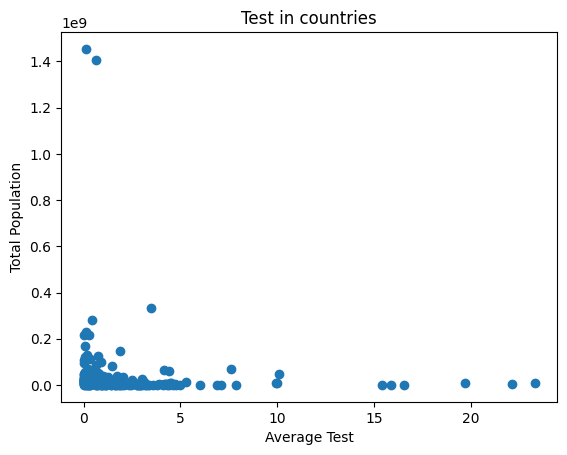

In [ ]:
x_axis = df['Total Test']/df['Population']
y_axis = df['Population']

plt.scatter(x_axis, y_axis)
plt.title('Test in countries')
plt.xlabel('Average Test')
plt.ylabel('Total Population')
plt.show()

Sơ đồ cho thấy có khá nhiều nước có trung bình test nhiều hơn 3 lần/ người, tuy nhiên chiếm tỷ lệ không quá cao so với toàn thế giới. Có những nước không cung cấp đủ trung bình 1 test/người, nằm chủ yếu ở khu vực các nước đang phát triển, cho thấy sự chênh lệch về sự đầu tư phòng chống covid giữa các quốc gia.

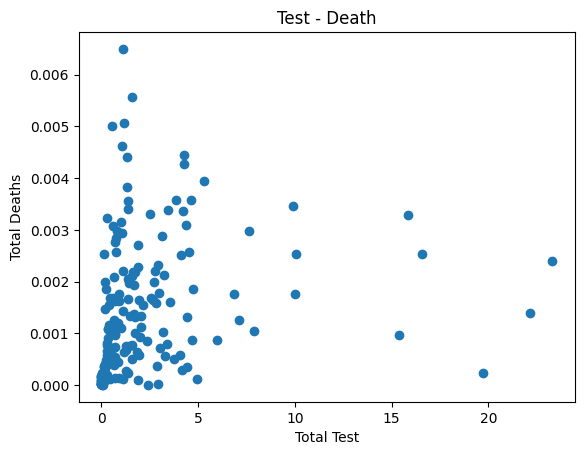

In [ ]:
x_axis = df['Total Test']/df['Population']
y_axis = df['Total Deaths']/df['Population']

plt.scatter(x_axis, y_axis)
plt.title('Test - Death')
plt.xlabel('Total Test')
plt.ylabel('Total Deaths')
plt.show()

Ta thấy trực quan rằng chỉ những nước có số lượng trường hợp những nước có số lượng mũi test covid trung bình trên người dưới 5 thì mới có tỷ lệ tử vong (so với số lượng dân số nước đó) cao. Có thể nói rằng, việc test nhiều sẽ ảnh hưởng đến khả năng phòng chống covid, do có kế hoạch điều trị và cách li từ sớm khiến virus không có nhiều cơ hội lây lan cộng đồng.

***Thái***

Vấn đề :Tương quan giữa cặp features Ca bệnh - phục hồi. Liệu tỉ lệ phục hồi của các nước sẽ như thế nào so với ca bệnh. Nhóm nước hay nơi nào có tỉ lệ phục hồi cao (thấp).

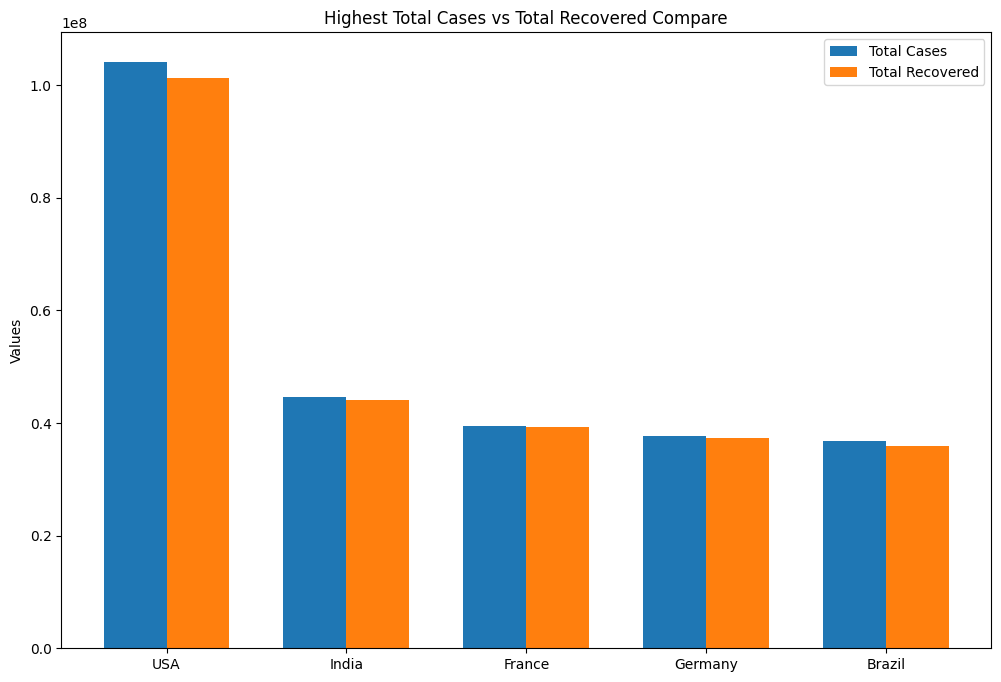

In [ ]:
sort_df = df.sort_values('Total Recovered', ascending=False)

data1 = sort_df['Total Cases'].head()
data2 = sort_df['Total Recovered'].head()
labels = sort_df['Country'].head()


x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, data1, width, label='Total Cases')
rects2 = ax.bar(x + width/2, data2, width, label='Total Recovered')

ax.set_ylabel('Values')
ax.set_title('Highest Total Cases vs Total Recovered Compare')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

Tỉ lệ các ca hồi phục ở các nước có ca nhiễm bệnh nhiều nhất đều nằm ở mức cao.

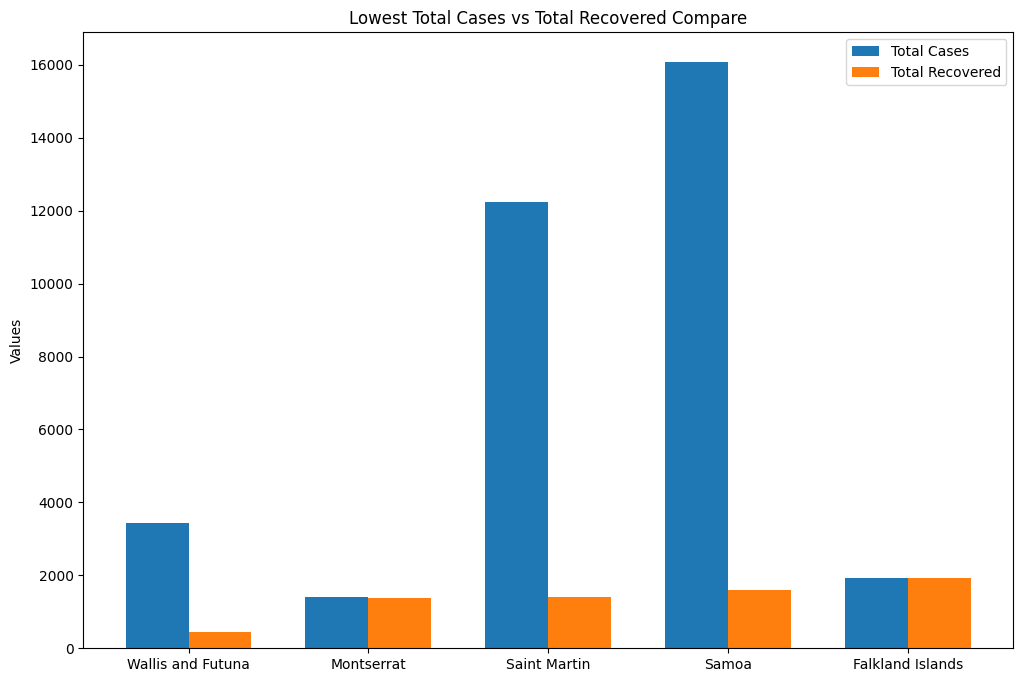

In [ ]:
sort_df = df.sort_values('Total Recovered', ascending=True)

data1 = sort_df['Total Cases'].head()
data2 = sort_df['Total Recovered'].head()
labels = sort_df['Country'].head()


x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, data1, width, label='Total Cases')
rects2 = ax.bar(x + width/2, data2, width, label='Total Recovered')

ax.set_ylabel('Values')
ax.set_title('Lowest Total Cases vs Total Recovered Compare')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

 Tỉ lệ ca hồi phục của các nước có ca mắc thấp nhất thế giới ngoài Montserrat và Đảo Falkland đều ở mức rất thấp.

**Thái**

Vấn đề: Đánh giá về sự tương quan giữa ca bệnh - dân số (correlation between cases - population). Rút ra nhận xét xem liệu dân số có ảnh hưởng đến việc có nhiều ca nhiễm bệnh hay không qua biểu đồ.

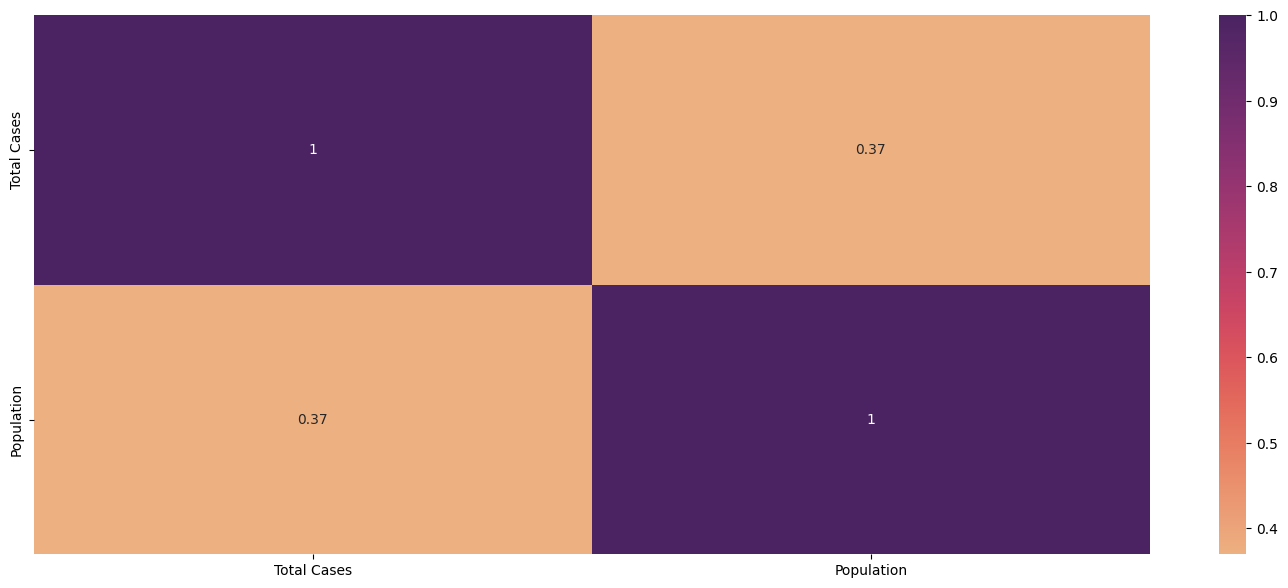

In [ ]:
corr_matrix = df[['Total Cases','Population']].corr()
plt.figure(figsize=(18,7))
sns.heatmap(corr_matrix, cmap = "flare", annot=True)
plt.show()

**Biểu đồ thể hiện sự tương quan giữa Dân số và Các ca nhiễm bệnh**

Số liệu biểu đồ cho thấy sự tương quan giữa Dân số và ca nhiễm bệnh là 0.37 -> tỉ lệ tương quan thấp.

*Kết luận: Dân số ảnh hưởng ít đến các ca nhiễm bệnh*

**Tú**

Tổng quan lại những yếu tố nào là tác động đến tỉ lệ tử vong để xây dựng mô hình dự đoán.

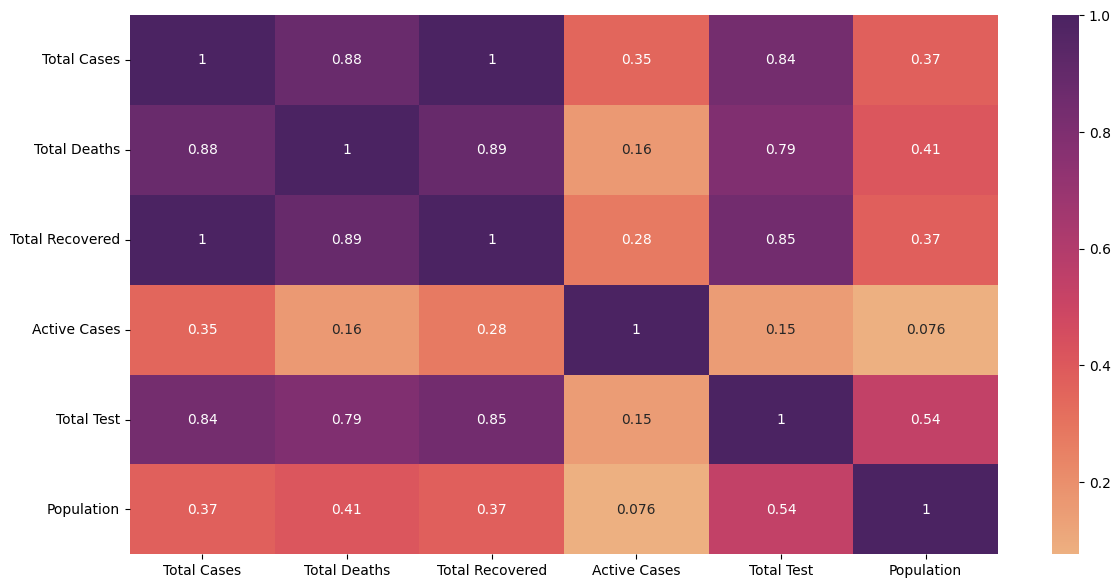

In [ ]:
df = df.drop(['Ratio of Death','Ratio of Recovery'], axis = 1)
corr_matrix = df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, cmap = "flare", annot=True)
plt.show()

**Tỉ lệ tương quan với Total Deaths**
1. Total Cases: 88%
2. Total Test:79%
3. Active Cases: 16%
4. Total Recovered: 89%
5. Population: 41%

# ***Prediction***

**Tú**

**Feature Selecting**

In [ ]:
features = ['Total Cases', 'Total Recovered','Total Test','Population']
X = df[features]
y = df['Total Deaths']

**Spliting Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size= 0.8, test_size= 0.2, random_state=0)


**Training Machine Learning Model**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state =1)

#fit data to model
reg.fit(X_train, y_train)
y_preds = reg.predict(X_valid)

In [ ]:
df = ps.DataFrame(y_valid)
df = df.reset_index()
df['Predict Total Deaths'] = y_preds
df = df.rename(columns={'Total Deaths': 'Actually Total Deaths'})
df = df.drop(['index'], axis = 1)
df

,Actually Total Deaths,Predict Total Deaths
0,311.0,2250.422439
1,18615.0,46046.846696
2,103.0,515.353503
3,1543.0,4548.523371
4,860.0,1246.149924
5,20106.0,17154.335803
6,824.0,1477.712498
7,46.0,377.210094
8,4628.0,-2663.231849
9,160817.0,280506.619799


**Model Evaluation**

In [ ]:
min_value = df['Actually Total Deaths'].min()
max_value = df['Actually Total Deaths'].max()

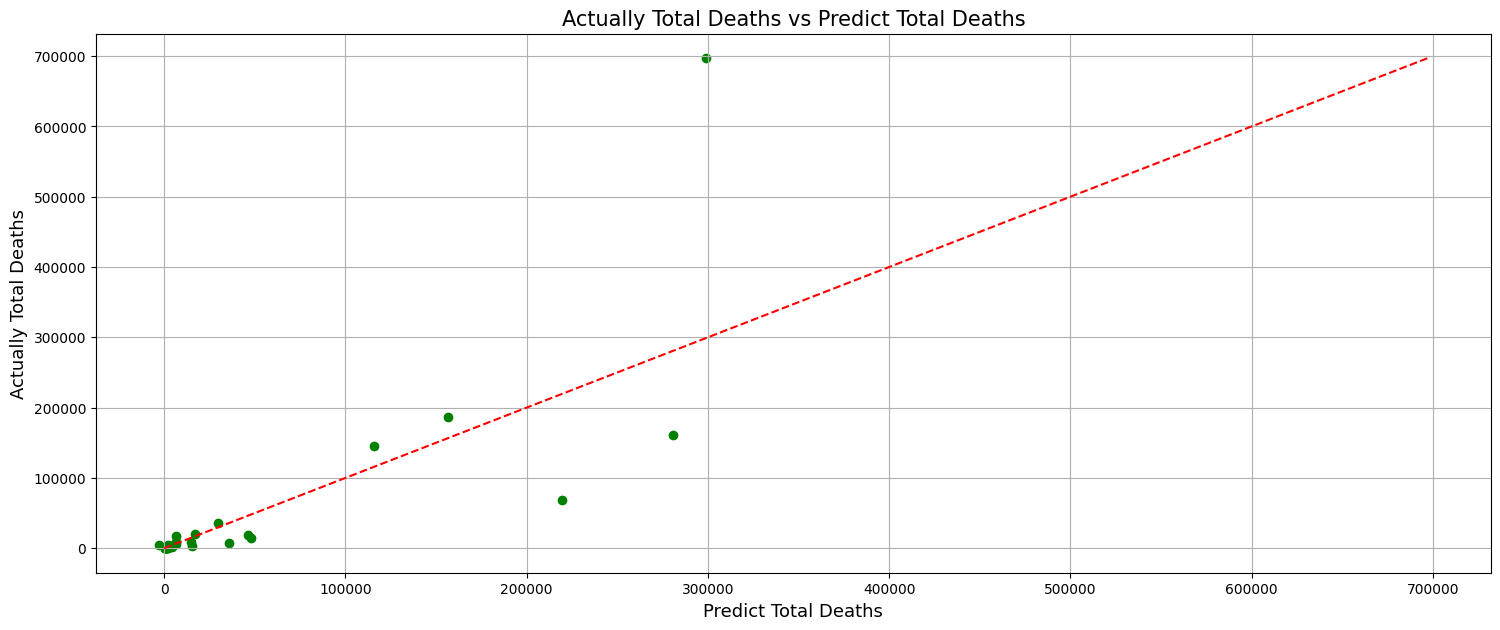

In [ ]:
x = y_preds
y = y_valid
plt.figure(figsize=(18,7))
plt.scatter(x, y, color = 'green')
plt.plot([min_value, max_value], [min_value, max_value], linestyle='--', color='red')
plt.title('Actually Total Deaths vs Predict Total Deaths', fontsize = 15)
plt.xlabel('Predict Total Deaths', fontsize = 13)
plt.ylabel('Actually Total Deaths', fontsize= 13)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = mean_squared_error(y_valid, y_preds, squared=False)
r2 = r2_score(y_valid, y_preds)

print("Root mean squared error: %.2f" % rmse)
print("R-squared: %.2f" % r2)

Root mean squared error: 70827.04
R-squared: 0.62


**Viet Nam with update 2023 info about Covid -19**

In [ ]:
c = [11526858] #case
r = [1900000] #population
t = [30000000]
p = [99686866] #population
data = {'Total Cases':c,'Total Recovered':r,'Total Test':t,'Population':p}
vn_data = ps.DataFrame(data)
vn_preds = reg.predict(vn_data)
vn_preds


array([59046.63709182])

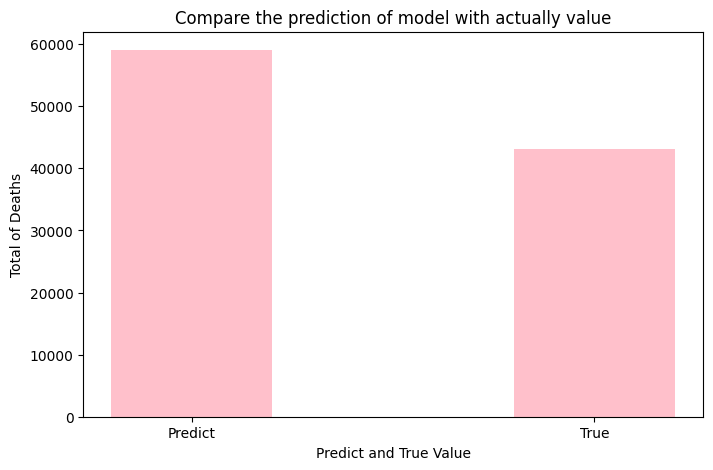

In [ ]:
x = ['Predict','True']
y = [59046.63709182,43186]
data = {'PaT': x,'Total Deaths':y}
df = ps.DataFrame(data)
plt.figure(figsize=(8,5))
plt.bar(df['PaT'], df['Total Deaths'], width = 0.4, color = '#FFC0CB')
plt.xlabel('Predict and True Value')
plt.ylabel('Total of Deaths')
plt.title('Compare the prediction of model with actually value')
textbox = plt.text(0.5, 0.5, 'Hello World')
textbox.remove()
